In [ ]:
class LinearRegressionGD(object):
  def __init__(self, fit_intercept=True, copy_X=True, eta0=0.001, epochs=1000, batch_size=1, weight_decay=0.9, shuffle=True):
    #fit_intercept : 절편의 추가 여부
    self.fit_intercept = fit_intercept
    self.copy_X = copy_X
    self._eta0 = eta0
    self._epochs = epochs

    self._coef = None
    self._intercept = None
    self._new_X = None
    self._w_history = None
    self._weight_decay = weight_decay
    self._batch_size = batch_size
    self._is_SGD = shuffle

  def gradient(self, X, y, theta):
    return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

  def fit(self, X, y):
    self._new_X = np.array(X)
    y = y.reshape(-1,1)

    if self.fit_intercept:
      intercept_vector = np.ones([len(self._new_X), 1])
      self._new_X = np.concatenate(
          (intercept_vector, self._new_X), axis=1)
      
    theta_init = np.random.normal(0, 1, self._new_X.shape[1])
    self._w_history = [theta_init]
    self._cost_history = [self.cost(self.hypothesis_function(self._new_X, theta_init), y)]

    theta = theta_init

    for epoch in range(self._epochs):
      X_copy = np.copy(self._new_X)

      if self._is_SGD:
        np.random.shuffle(X_copy)

      batch = len(X_copy) // self._batch_size

      for batch_count in range(batch):
        X_batch = np.copy(X_copy[batch_count * self._batch_size : (batch_count + 1) & self._batch_size ])

        gradient = self.gradient(X_batch, y, theta).flatten()
        theta = theta - self._eta0 * gradient
        
      if epoch % 100 == 0:
        self._w_history.append(theta)
        cost = self.cost(self.hypothesis_function(self._new_X, theta), y)
        self._cost_history.append(cost)
      self._eta0 = self._eta0 * self._weight_decay

    if self.fit_intercept:
      self._intercept = theta[0]
      self._coef = theta[1:]
    else:
      self._coef = theta

  def cost(self, h, y):
    return 1/(2*len(y)) * np.sum((h-y).flatten()**2)

  def hypothesis_function(self, X, theta):
    return X.dot(theta).reshape(-1, 1)

  def gradient(self, X, y, theta):
    return X.T.dot(self.hypothesis_function(X, theta)-y) / len(X)

  def fit(self, X, y):
    self._new_X = np.array(X)

    y = y.reshape(-1, 1)

    if self.fit_intercept:
      intercept_vector = np.ones([len(self._new_X), 1])
      self._new_X = np.concatenate((intercept_vector, self._new_X), axis=1)

    theta_init = np.random.normal(0, 1, self._new_X.shape[1])
    self._w_history = [theta_init]
    self._cost_history = [self.cost(self.hypothesis_function(self._new_X, theta_init), y)]

    theta = theta_init

    for epoch in range(self._epochs):
      gradient = self.gradient(self._new_X, y, theta).flatten()
      theta = theta - self._eta0 * gradient

      if epoch % 100 == 0:
        self._w_history.append(theta)
        cost = self.cost(self.hypothesis_function(self._new_X, theta), y)
        self._cost_history.append(cost)
      self._eta0 = self._eta0 * self._weight_decay

    if self.fit_intercept:
      self._intercept = theta[0]
      self._coef = theta[1:]
    else:
      self._coef = theta

  def predict(self, X):
    test_X = np.array(X)

    if self.fit_intercept:
      intercept_vector = np.ones([len(test_X), 1])
      test_X = np.concatenate((intercept_vector, test_X), axis=1)
      weights = np.concatenate(([self._intercept], self._coef), axis=0)
    else:
      weights = self._coef

    return test_X.dot(weights)

  @property
  def coef(self):
    return self._coef

  @property
  def intercept(self):
    return self._intercept

  @property
  def weights_history(self):
    return np.array(self._w_history)

  @property
  def cost_history(self):
    return self._cost_history

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/source/ch08/train.csv')

X = df['x'].values.reshape(-1,1)
y = df['y'].values

gd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=False)
bgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=len(X), shuffle=False)
sgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=1, shuffle=True)
msgd_lr = LinearRegressionGD(eta0=0.001, epochs=10000, batch_size=100, shuffle=True)

In [ ]:
gd_lr.fit(X, y)
bgd_lr.fit(X, y)
sgd_lr.fit(X, y)
msgd_lr.fit(X, y)

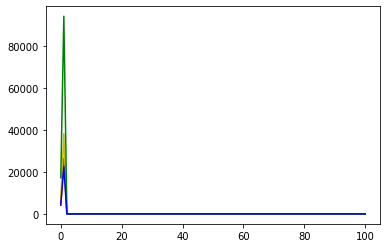

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c='r')
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c='y')
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c='g')
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c='b')


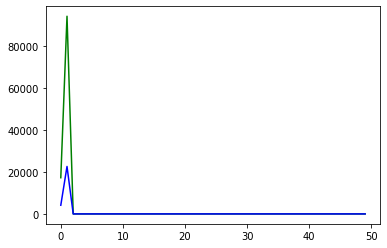

In [ ]:
plt.plot(range(50), sgd_lr.cost_history[:50], c='g')
plt.plot(range(50), msgd_lr.cost_history[:50], c='b')

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_data = pd.read_csv('/content/housing (1).data', sep='\s+', header = None)
df_data.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [26]:
df_data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [29]:
y_data = df_data['MEDV']
y_data = y_data.values
y_data = y_data.reshape(-1,1)

df_data = df_data.drop('MEDV', axis=1)
x_data = df_data.values

In [30]:
y_data.shape

(506, 1)

In [31]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) #feature_range : 최대 최솟값을 지정하는 매개변수
x_scaled_data = minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.33)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

In [33]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=8)
#fit_intercept : 절편을 사용할지 말지
#copy_X : 학습 시 데이터를 복사한 후 학습을 할지 결정
#n_jobs : 연산을 위해 몇 개의 CPU를 사용할 지
#alpha : 패널티값(lambda), 라쏘, 리지, sgd에 있음

#in SGD : alpha 페널티 함수(lambda), max_iter 최대 반복 횟수, tol 반복이 멈추는 최솟값, eta0 학습률
lasso_regr = linear_model.Lasso(alpha=0.01, fit_intercept=True, normalize=False, copy_X=True)
ridge_regr = linear_model.Ridge(alpha=0.01, fit_intercept=True, normalize=False, copy_X=True)
SGD_regr = linear_model.SGDRegressor(penalty='l2', alpha=0.01, max_iter=1000, tol=0.001, eta0=0.01)


In [34]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(n_jobs=8, normalize=False)

In [35]:
print('Coefficients: ', regr.coef_) # x의 n제곱의 계수
print('intercept: ', regr.intercept_) # 상수항

Coefficients:  [[-2.35972352  1.14742192 -0.08818337  0.50848765 -1.2608769   3.60267471
   0.1356252  -3.50542321  1.52310421 -1.38633113 -1.50514401  1.11409747
  -4.17225577]]
intercept:  [24.86664653]


In [36]:
regr.predict(x_data[:5]) # 실제 예측

array([[ 52.36427663],
       [ 84.82258716],
       [101.94679958],
       [130.24057537],
       [124.38738088]])

In [37]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_ # 위의 코드를 수식으로 풀어쓴 것 즉, 결과가 같음

array([[ 52.36427663],
       [ 84.82258716],
       [101.94679958],
       [130.24057537],
       [124.38738088]])

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat) # 오차를 수치로 확인

(0.7308357253591455, 3.5664706424770145, 23.45094008218374)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

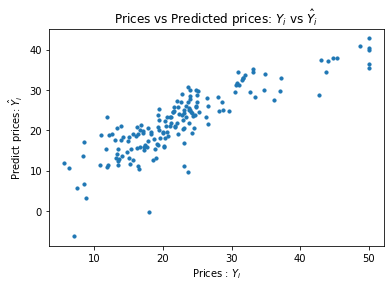

In [40]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel('Prices : $Y_i$')
plt.ylabel('Predict prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$')